## 分类

In [1]:
from sklearn.datasets import load_iris
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
iris = load_iris()
x,y = iris.data,iris.target
x, x_test, y, y_test = train_test_split(x, y, test_size=0.2, random_state=420) 

In [3]:
params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 3,
    'gamma': 0.1,
    'max_depth': 6,
    'lambda': 2,
    'subsample': 0.7,
    'colsample_bytree': 0.75,
    'min_child_weight': 3,
    'verbosity': 0,
    'eta': 0.1,
    'seed': 1,
    'nthread': 4,
}

dtrain = xgb.DMatrix(x, y)
num_rounds = 120
model = xgb.train(params, dtrain, num_rounds)

In [4]:
dtest = xgb.DMatrix(x_test)
y_pred = model.predict(dtest)

In [5]:
accuracy = accuracy_score(y_test,y_pred)
print("accuarcy: %.2f%%" % (accuracy*100.0))

accuarcy: 96.67%


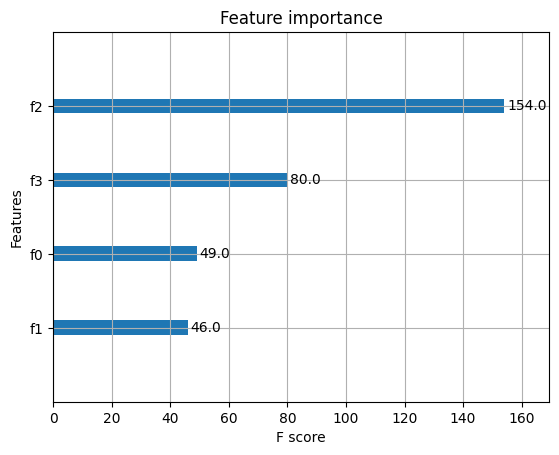

In [6]:
plot_importance(model)
plt.show()

## 回归

In [7]:
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

In [8]:
boston = load_boston()
X,Y = boston.data,boston.target
x, x_test, y, y_test = train_test_split(X, Y, test_size=0.2, random_state=420)

d:\Users\69243\anaconda3\envs\test\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing

In [9]:
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'gamma': 0.1,
    'max_depth': 5,
    'lambda': 3,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'verbosity': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
}

dtrain = xgb.DMatrix(x, y)
num_rounds = 120
model = xgb.train(params, dtrain, num_rounds)

In [10]:
dtest = xgb.DMatrix(x_test)
test_pre = model.predict(dtest)

In [11]:
from sklearn.linear_model import LinearRegression
line=LinearRegression()
line.fit(x, y)
line_pre = line.predict(x_test)

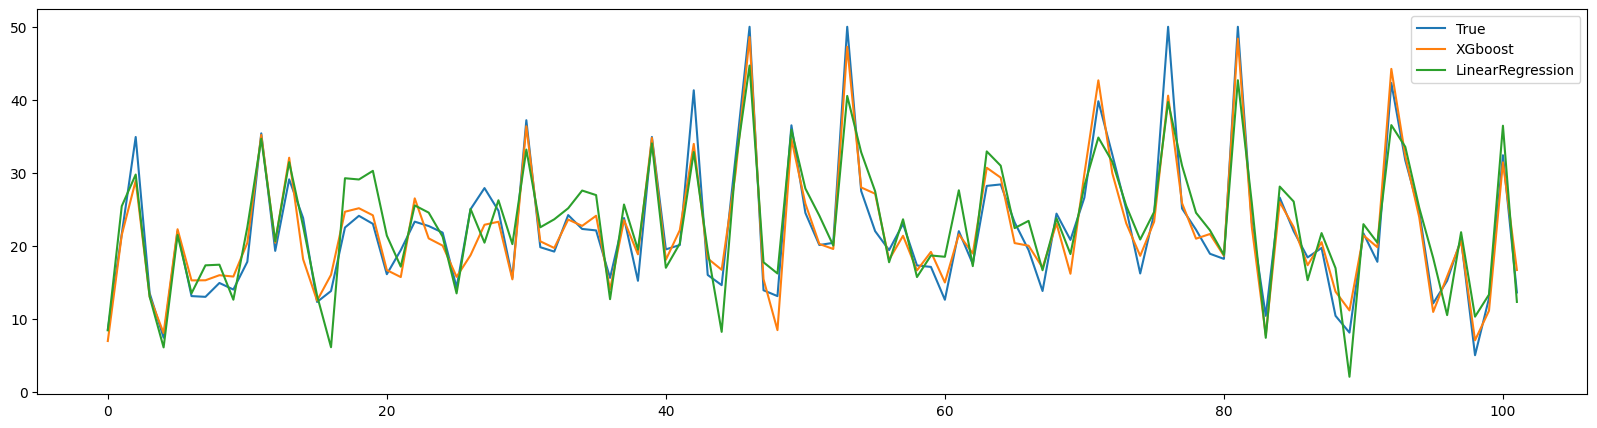

In [12]:
plt.figure(figsize=(20, 5))   
plt.plot(y_test,label='True')
plt.plot(test_pre,label='XGboost')
plt.plot(line_pre,label='LinearRegression')
plt.legend()

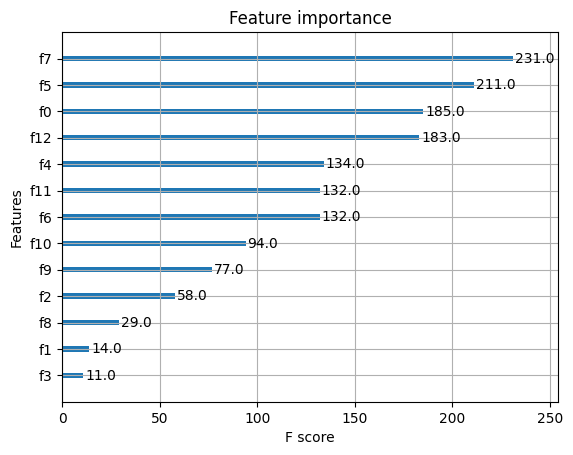

In [13]:
plot_importance(model)
plt.show()